# （1）svm_easy_example

In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   # 绘图模块
from sklearn import svm

## 绘制决策边界函数


In [252]:
#定义SVC可视化函数
def plot_svc_decision_1(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()                 # 获取坐标轴
    # print(xlim,ylim)
    x = np.linspace(xlim[0],xlim[1],10)
    y = np.linspace(ylim[0],ylim[1],10)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    # ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
    ax.contour(X, Y, P,colors=["w","r","w"],linewidths=[0,4,0],levels=[-1,0,1],linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.savefig("svmdata1 scatter+decision diagram.jpg",dpi=300)
    plt.show()

In [253]:
def plot_svc_decision_2(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]   # w
    b = svm_clf.intercept_[0]  # b

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=60, facecolors='#FFAAAA')   # 绘制支持向量
    plt.plot(x0, decision_boundary, "k-", linewidth=2)   # 超平面
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [254]:
def plot_svc_decision_3(clf, axes,ax=None):
    if ax is None:
        ax = plt.gca()
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    # plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    #plt.contourf(x0, x1, y_pred, cmap=plt.cm.Spectral, alpha=0.2)
    ax.contour(x0, x1, y_pred,colors=["w","r","w"],linewidths=[0,3,0],linestyles=["--","-","--"])
    # plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    plt.savefig("svmdata2 scatter+decision diagram.jpg",dpi=300)   # 保存图像

## svmdata1

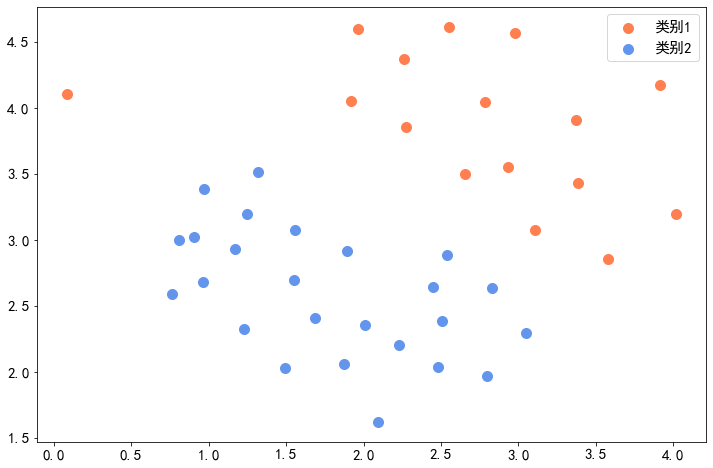

In [255]:
data1 = pd.read_csv('data/svmdata1.csv')     # 读取数据
positive = data1[data1['y'].isin([1])]       # 类别-1
negative = data1[data1['y'].isin([0])]       # 类别-2

fig, ax = plt.subplots(figsize=(12, 8))      # 新建画布，fig是图、ax是坐标轴
plt.rcParams['font.sans-serif']=['SimHei']   # 设置中文字体
plt.rcParams['font.size'] = '15'             # 设置label字体大小
ax.scatter(positive['X1'], positive['X2'], s=100, marker='o', c='coral', label='类别1')           # 绘制散点图，s=100为散点大小
ax.scatter(negative['X1'], negative['X2'], s=100, marker='o', c='cornflowerblue', label='类别2')  # 绘制散点图
ax.legend()         # 添加图例

plt.savefig("svmdata1 scatter diagram.jpg",dpi=300)      # 保存图像
plt.show()          # 显示图像

In [256]:
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)  # 线性决策：loss损失函数、max_iter最大迭代次数
svc.fit(data1[['X1', 'X2']], data1['y'])
print('The classify accuracy is:')
svc.score(data1[['X1', 'X2']], data1['y'])

The classify accuracy is:


0.975609756097561

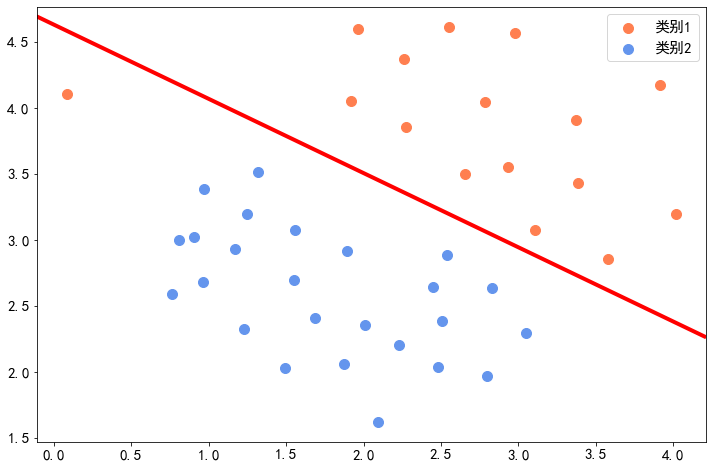

In [257]:
fig, ax = plt.subplots(figsize=(12, 8))      # 新建画布，fig是图、ax是坐标轴
ax.scatter(positive['X1'], positive['X2'], s=100, marker='o', c='coral', label='类别1')  # 绘制散点图，s=100为散点大小
ax.scatter(negative['X1'], negative['X2'], s=100, marker='o', c='cornflowerblue', label='类别2')  # 绘制散点图
ax.legend()                 # 添加图例
plot_svc_decision_1(svc)    # 画决策边界

In [258]:
data1_test = pd.read_csv('data/svmdata1_test.csv')     # 读取数据svmdata1_test
print('The classify accuracy is:')
svc.score(data1_test[['X1', 'X2']], data1_test['y'])

The classify accuracy is:


1.0

## svmdata2

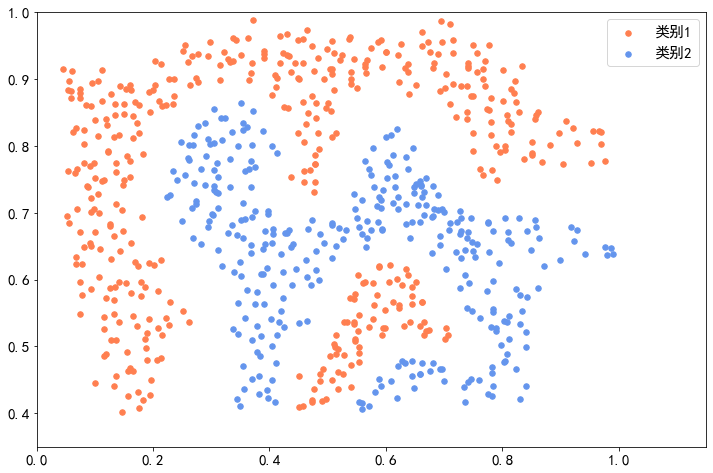

In [263]:
data2 = pd.read_csv('data/svmdata2.csv')   # 读取数据
positive = data2[data2['y'].isin([1])]    # 类别-1
negative = data2[data2['y'].isin([0])]    # 类别-2

fig, ax = plt.subplots(figsize=(12, 8))   # 新建画布，fig是图、ax是坐标轴
ax.scatter(positive['X1'], positive['X2'], s=30, marker='o',c='coral', label='类别1')            # 绘制散点图，s=50为散点大小
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o',c='cornflowerblue', label='类别2')   # 绘制散点图
ax.legend()         # 添加图例
plt.axis([0.0, 1.15, 0.35, 1.0])
plt.savefig("svmdata2 scatter diagram.jpg",dpi=300)   # 保存图像
plt.show()          # 显示图像

In [260]:
svc = svm.SVC(C=1000, gamma=1000, probability=True)     # 非线性决策
svc.fit(data2[['X1', 'X2']], data2['y'])
print('The classify accuracy is:')
svc.score(data2[['X1', 'X2']], data2['y'])

The classify accuracy is:


1.0

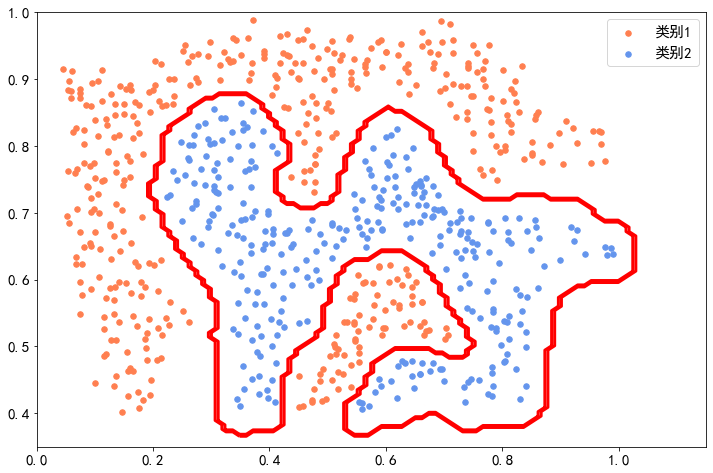

In [261]:
fig, ax = plt.subplots(figsize=(12, 8))      # 新建画布，fig是图、ax是坐标轴
ax.scatter(positive['X1'], positive['X2'], s=30, marker='o', c='coral', label='类别1')  # 绘制散点图，s=100为散点大小
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', c='cornflowerblue', label='类别2')  # 绘制散点图
ax.legend()         # 添加图例
plot_svc_decision_3(svc, [0.0, 1.15, 0.35, 1.0])

In [262]:
data1_test = pd.read_csv('data/svmdata2_test.csv')     # 读取数据svmdata2_test
print('The classify accuracy is:')
svc.score(data1_test[['X1', 'X2']], data1_test['y'])

The classify accuracy is:


0.8053097345132744